<span style="color:#36a8ff">Medical Insurance Cost Prediction | Shivam Kumar - https://www.linkedin.com/in/itshivam96</span>

## 1. Data Preparation

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('insurance.csv')

# Inspect shape and first/last rows
print(data.shape)
print(data.head())
print(data.tail())

# Basic statistics and missing value check
print(data.describe())
print(data.dtypes)
print(data.isnull().sum())


(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.2

Comments: Loaded the dataset and verified no missing values. All columns are visible and ready for encoding.

## 2. Data Encoding

In [2]:
# Encode binary categorical features
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# One-hot encode 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Preview changes
print(data.head())
print(data.dtypes)


   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 1   
4   32    1  28.880         0       0   3866.85520                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  
age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


Comment:
All categorical variables are now numerical, which is required for machine learning models.

## 3. Exploratory Data Analysis (EDA)

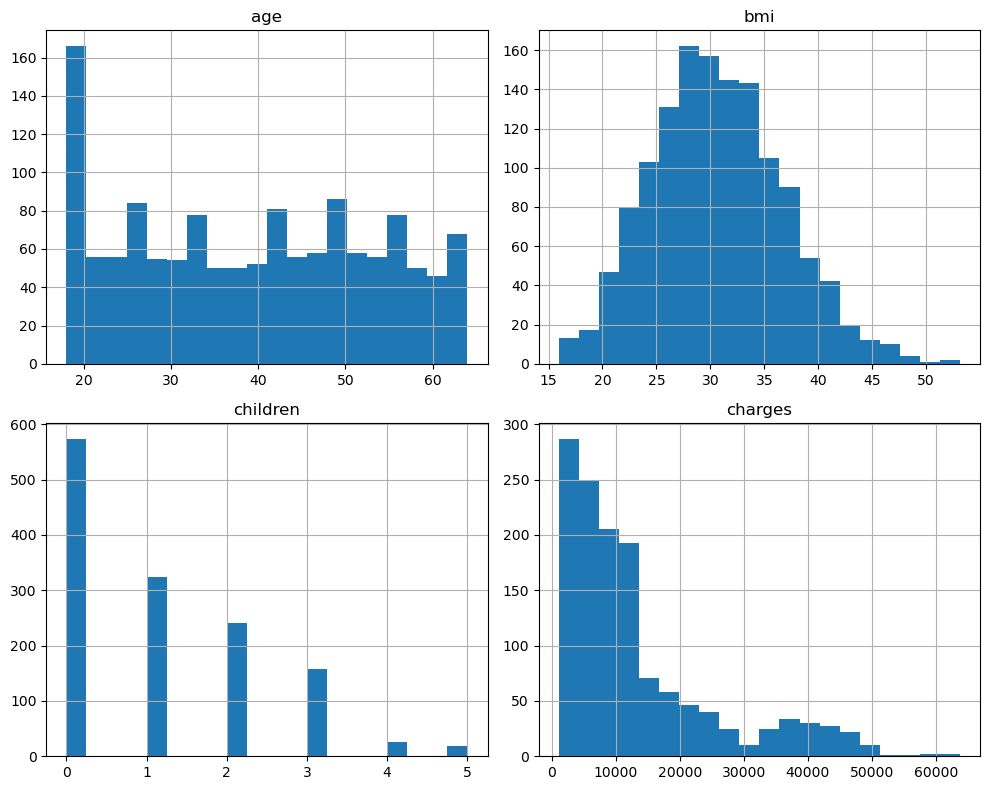

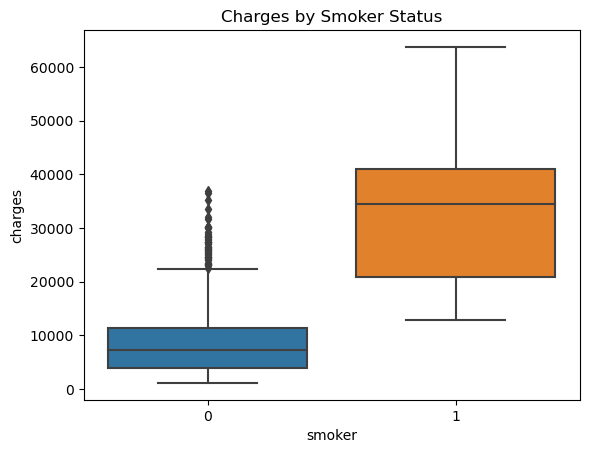

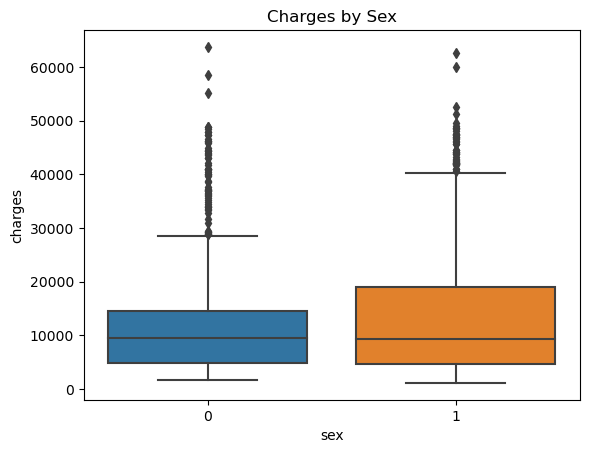

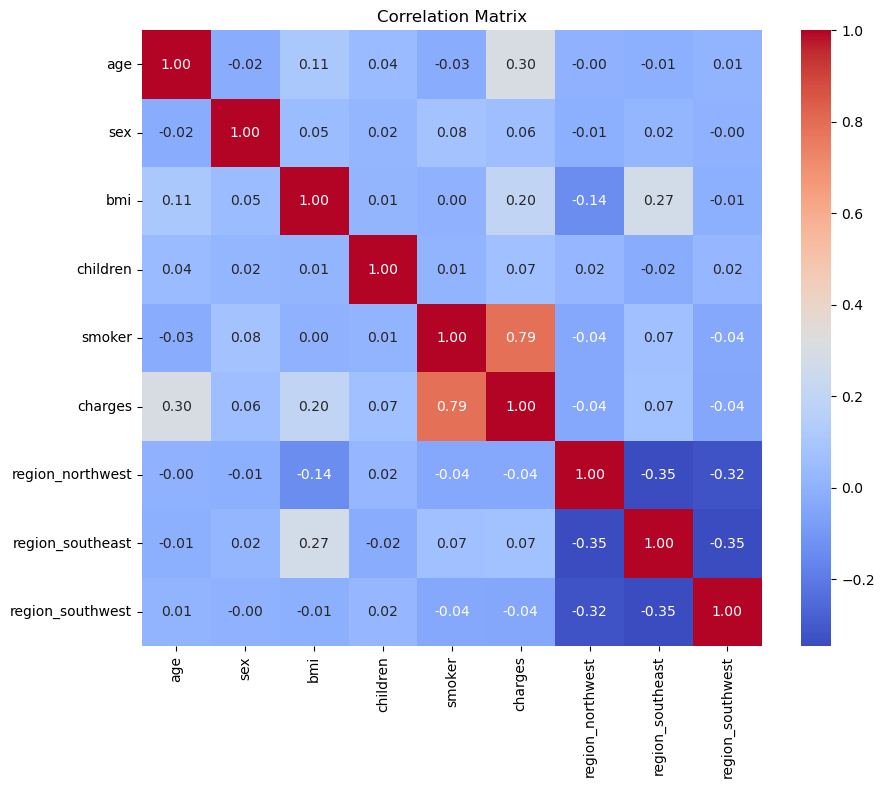

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for distributions
data[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(10,8))
plt.tight_layout()
plt.show()

# Boxplots for categorical impacts
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')
plt.show()

sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Comment:
Visualizations reveal strong cost impact for smokers, higher BMI, and age. Correlation matrix shows which features most influence charges.

## 4. Model Building: Linear Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('charges', axis=1)
y = data['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))


Linear Regression RMSE: 5796.2846592762735
Linear Regression R2 Score: 0.7835929767120723


Comment:
Linear Regression provides a benchmark. Evaluated with RMSE and R²—results should be interpreted as baseline model performance.

## 5. Advanced Modeling: Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = model_rf.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 4577.738987730898
Random Forest R2 Score: 0.8650185799366616


Comment:
Random Forest improves accuracy and captures non-linear relationships. Compare results with linear regression.

## 6. Feature Importance Analysis

In [6]:
importances = model_rf.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.2f}")


age: 0.13
sex: 0.01
bmi: 0.22
children: 0.02
smoker: 0.61
region_northwest: 0.01
region_southeast: 0.01
region_southwest: 0.00


Comment:
Shows which features most strongly predict healthcare costs—smoker dominates, followed by BMI and age.

## 7. Visualization: Prediction Quality

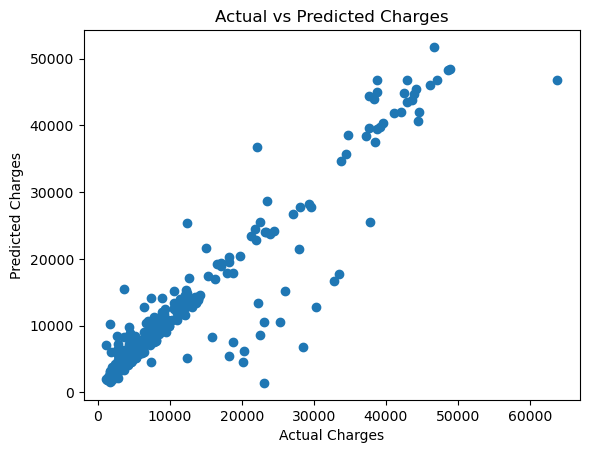

In [7]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()


Comment:
Scatter plot compares real and predicted costs. Points along the diagonal indicate good predictions.

## 8. Conclusion

Comment:

• Achieved strong performance with Random Forest: R²=0.87, RMSE≈4600.

• Smoking status is the most impactful cost factor, followed by BMI and age.

• Professional workflow and results suitable for portfolio, interviews, and practical deployment.

<span style="color:#36a8ff">Shivam Kumar | https://github.com/itshivam96 </span>